## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [22]:
!pip install icecream

  Running setup.py bdist_wheel for untokenize: started
  Running setup.py bdist_wheel for untokenize: finished with status 'done'
  Stored in directory: C:\Users\huoyi\AppData\Local\pip\Cache\wheels\f4\a0\63\012f35213063bcd1d92a1bb5f4a570fec73e2a0a335a9a7295
Successfully built untokenize


In [3]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
data = load_boston()

In [44]:
rm = data['data'][:, 5]
price = data['target']

In [38]:
def draw_rm_and_price(room, pri):
    plt.scatter(room, pri)

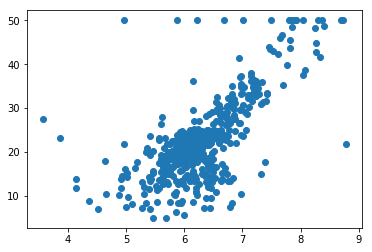

In [39]:
draw_rm_and_price(rm, price)

In [40]:
import random
import math

In [46]:
def predicted_price(rm, k, b):
    return k * rm + b

def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradient -= x_i
        
        elif y_i < y_hat_i:
            gradient += x_i
        
    
    return 1 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradient -= 1
        
        elif y_i < y_hat_i:
            gradient += 1
        
    
    return 1 / n * gradient

In [48]:
trying_times = 2000

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [predicted_price(r, current_k, current_b) for r in rm]
    
    current_loss = loss(price, price_by_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))

    k_gradient = partial_k(rm, price, price_by_k_and_b)
    
    b_gradient = partial_b(rm, price, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 6.5358257102296164 best_b: 52.81353539451521, and the loss is: 71.35600407865151
When time is : 50, get best_k: 6.5044025382928545 best_b: 52.80853539451505, and the loss is: 71.15352093173789
When time is : 100, get best_k: 6.472979366356093 best_b: 52.80353539451488, and the loss is: 70.95103778482425
When time is : 150, get best_k: 6.441556194419331 best_b: 52.798535394514715, and the loss is: 70.74855463791057
When time is : 200, get best_k: 6.410133022482569 best_b: 52.79353539451455, and the loss is: 70.54607149099702
When time is : 250, get best_k: 6.378709850545807 best_b: 52.78853539451438, and the loss is: 70.34358834408349
When time is : 300, get best_k: 6.347286678609045 best_b: 52.78353539451422, and the loss is: 70.14110519716978
When time is : 350, get best_k: 6.315863506672283 best_b: 52.77853539451405, and the loss is: 69.93862205025613
When time is : 400, get best_k: 6.284440334735521 best_b: 52.773535394513885, and the loss is: 69.736138

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [62]:
solution = {}

In [52]:
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [64]:
edit_distance('CGGAA', 'CGGGF')

2

In [74]:
solution

{('C', 'C'): '',
 ('C', 'CG'): 'ADD G',
 ('C', 'CGG'): 'ADD G',
 ('C', 'CGGG'): 'ADD G',
 ('C', 'CGGGF'): 'ADD F',
 ('CG', 'C'): 'DEL G',
 ('CG', 'CG'): '',
 ('CG', 'CGG'): 'ADD G',
 ('CG', 'CGGG'): 'ADD G',
 ('CG', 'CGGGF'): 'ADD F',
 ('CGG', 'C'): 'DEL G',
 ('CGG', 'CG'): 'DEL G',
 ('CGG', 'CGG'): '',
 ('CGG', 'CGGG'): 'ADD G',
 ('CGG', 'CGGGF'): 'ADD F',
 ('CGGA', 'C'): 'DEL A',
 ('CGGA', 'CG'): 'DEL A',
 ('CGGA', 'CGG'): 'DEL A',
 ('CGGA', 'CGGG'): 'SUB A => G',
 ('CGGA', 'CGGGF'): 'ADD F',
 ('CGGAA', 'C'): 'DEL A',
 ('CGGAA', 'CG'): 'DEL A',
 ('CGGAA', 'CGG'): 'DEL A',
 ('CGGAA', 'CGGG'): 'DEL A',
 ('CGGAA', 'CGGGF'): 'SUB A => F'}

In [68]:
solution['C', 'CG']

'ADD G'

In [77]:
def parse_solution(string1, string2, revenue_solution, distance):
    if distance == 0: return []
    
    else:
        operation = solution[string1, string2]

        if 'SUB' in operation:
            return parse_solution(string1[:-1], string2[:-1], revenue_solution, distance - 1) + [operation]
        
        elif 'ADD' in operation:
            return parse_solution(string1, string2[:-1], revenue_solution, distance - 1) + [operation]
        
        elif 'DEL' in operation:
            return parse_solution(string1[:-1], string2, revenue_solution, distance - 1) + [operation]

In [78]:
parse_solution('CGGAA', 'CGGGF', solution, 2)

['SUB A => G', 'SUB A => F']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:根据梯度可以预测函数变化值，从而得知该值是增加还是减少

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度是损失函数中导数的组合，下降则是让该导数组合变小


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:可以正确预测减少损失的方向

4. Using the simple words to describe: What's the machine leanring.¶

Ans:让机器根据给定的学习模型通过数据自我生成目标函数

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

In [ ]:
可以将问题分解逐步解答并保存每步答案。搜索问题主要用于寻找特殊路径

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

In [ ]:
动态规划与机器学习并不冲突，动态规划可以理解为一种思路，而机器学习可能会用到这种思路。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

In [ ]:
编辑距离，铺瓷砖，硬币找零

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

In [ ]:
文本相似度，错词纠正，基因序列相似度

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

In [ ]:
无后效性，子问题的解不会更改。分析最优子结构。保存子问题解。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

In [ ]:
没有统一模型？

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

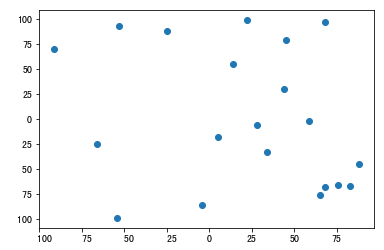

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

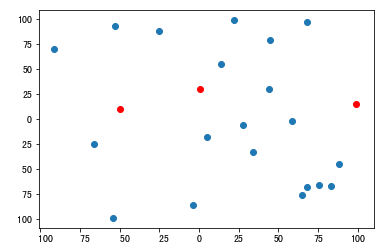

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro